# (Ford GoBike System Data)
## by (Mahmoud momen)

## Preliminary Wrangling

This report looks at a set of data that contains information about individual trips taken in a bike-sharing system that covers San Francisco (2019).

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.shape

(183412, 16)

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [6]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id'] = df['start_station_id'].astype('str')
df['end_station_id'] = df['end_station_id'].astype('str')
df['bike_id'] = df['bike_id'].astype('str')
df['Age'] = df['member_birth_year'].fillna(0).astype(int)
df['member_birth_year']=2019.0-df['member_birth_year']
df.head()


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,35.0,Male,No,1984
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,0
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,47.0,Male,No,1972
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,30.0,Other,No,1989
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,45.0,Male,Yes,1974


In [7]:
#dropping the non useful columns
df.drop(columns =['start_station_latitude','start_station_longitude','end_station_longitude','end_station_latitude'], axis = 1, inplace = True)


In [8]:
#checking for duplicates
sum(df.duplicated())


0

In [9]:

df['start_day'] = df.start_time.dt.weekday 


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

In [10]:
#creating a useful column
df2=df['duration_minutes'] = df['duration_sec']/60


In [11]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age,start_day,duration_minutes
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,35.0,Male,No,1984,3,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,0,3,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,47.0,Male,No,1972,3,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,70.0,Central Ave at Fell St,6638,Subscriber,30.0,Other,No,1989,3,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,45.0,Male,Yes,1974,3,26.416667


In [12]:
#function for some distributions
def MyHistPlot(df,xvar,bins=30,figsize=[14,6]):

    df[xvar].hist(bins=bins, grid=False, edgecolor='black', figsize=figsize);
    xvar=xvar.replace('_',' ')

    plt.title(f'{xvar}'.title(), fontsize=14, weight = 'bold')

    plt.xlabel(xvar.title(), fontsize = 10, weight='bold')

    plt.ylabel('Frequency'.title(),fontsize=10, weight= 'bold')

#### What is the age of users that have the highest frequency? 

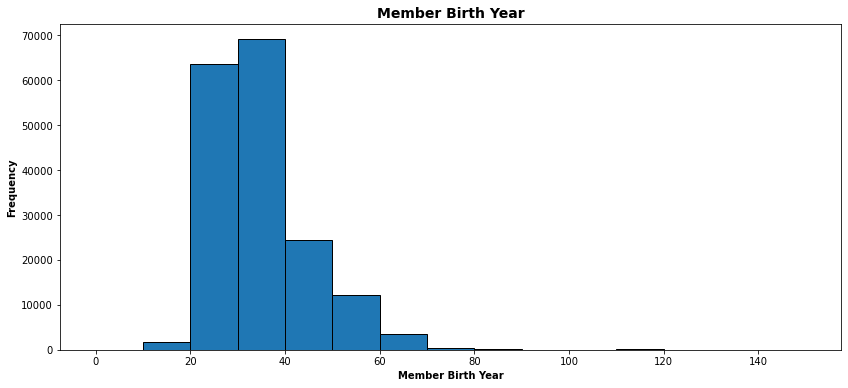

In [13]:
bins = np.arange(0,df['member_birth_year'].max()+10,10)

MyHistPlot(df,'member_birth_year',bins=bins)

#### The number of people with age about 30 years are greater.


#### What is the frequency of the trip durations?

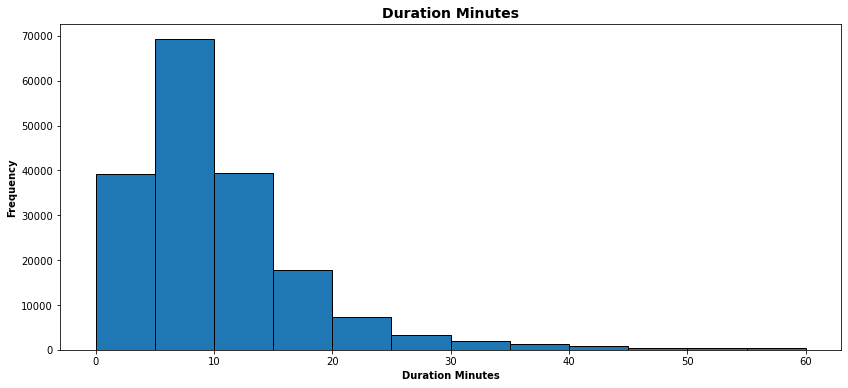

In [14]:
bins = np.arange(0,df['duration_minutes'].quantile(0.99)+5,5)
MyHistPlot(df,'duration_minutes',bins=bins)

In [15]:
#another function for count plots
def MyCountPlot(df,yvar,font_scale=1.4, rot=0):

    df[yvar].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)


    plt.title(f'{yvar}'.title(), fontsize=14, weight = 'bold')

    plt.ylabel("no. of People", labelpad=14)


####  Which gender has the highest number of users?

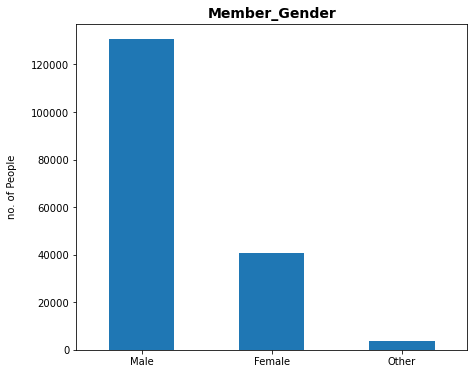

In [16]:
MyCountPlot(df,'member_gender')

#### The distribution shows that the number of males is greater.

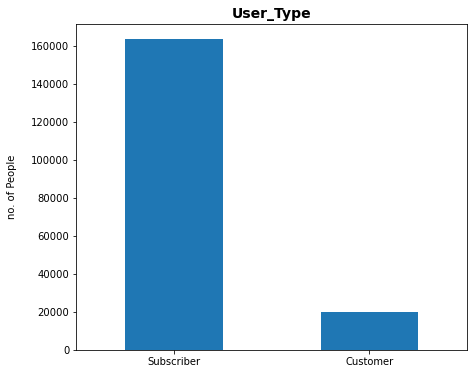

In [17]:
MyCountPlot(df,'user_type')

#### The number of people with age about 30 years are greater.

#### What are the top counted end stations?

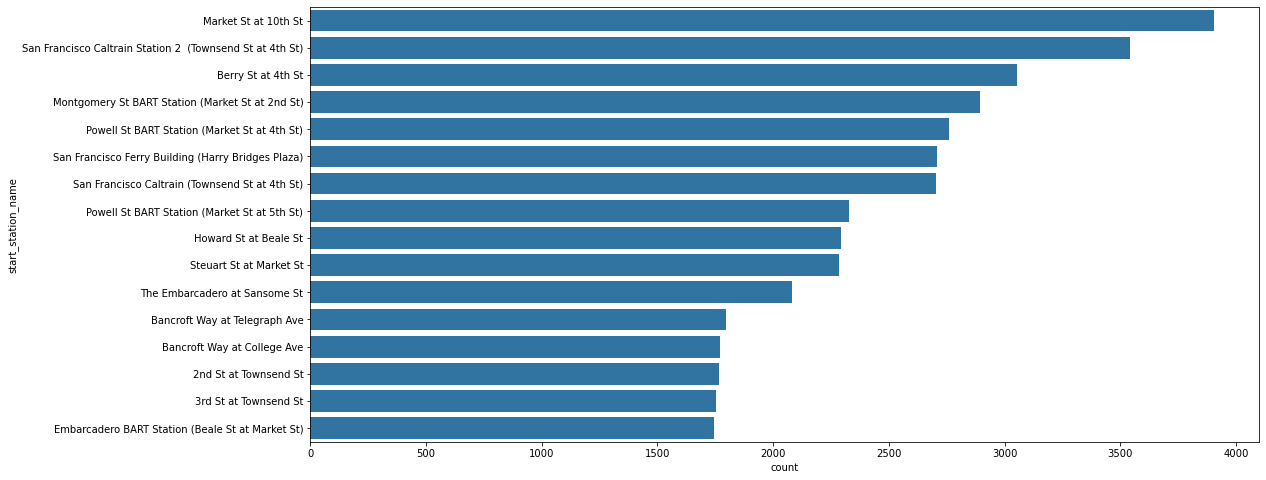

In [18]:
base_color = sb.color_palette()[0]
stations = df['start_station_name'].value_counts().index[:16]
plt.figure(figsize=[17,8])
sb.countplot(data = df, y = 'start_station_name', color = base_color, order = stations);

#### What are the top counted start stations?

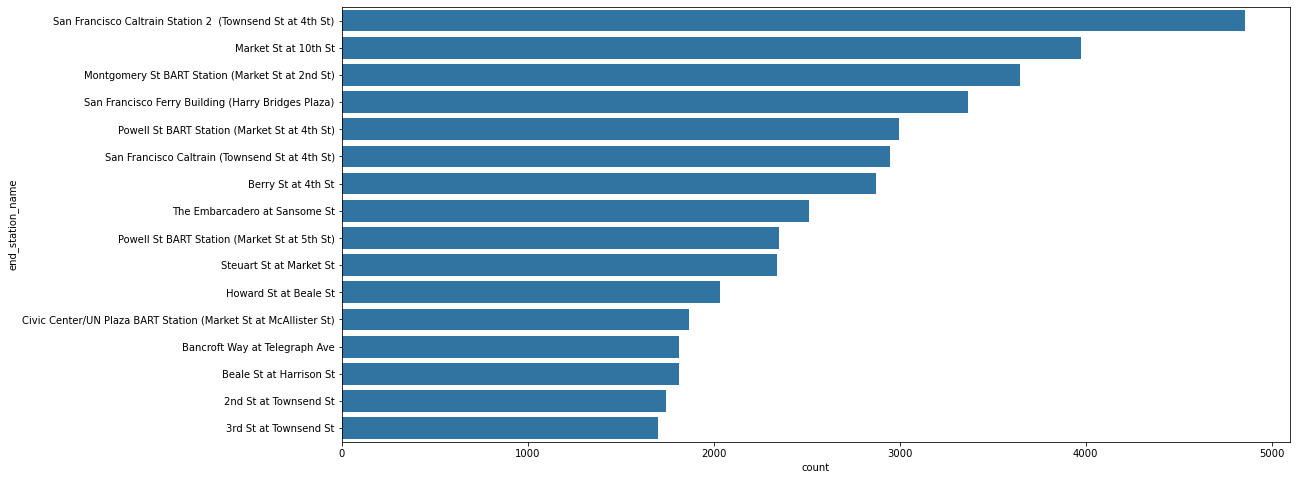

In [19]:
order = df['end_station_name'].value_counts().index[:16]
plt.figure(figsize=[17,8])
sb.countplot(data = df, y = 'end_station_name', color = base_color, order = order);

#### The percentage of answer no in bike share for all trips exceeds by 90.5%


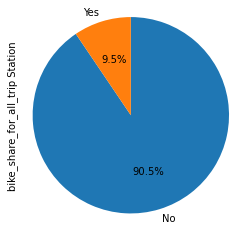

In [20]:
counts = df['bike_share_for_all_trip'].value_counts()
plt.pie(counts, labels = counts.index, startangle = 90,
        counterclock = False, autopct='%1.1f%%');
plt.ylabel('bike_share_for_all_trip Station')

plt.axis('square');


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Bike share users are mostly male and around 25 to 40 years old, and most use the service for short trips.
The number of subscribers is much greater than the customers but the customer's trip durations is longer than the subscriber's trip durations.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The data was clean but in some distibutions, I had to convert the trip_dustributions in minuts so the distribution be more clear.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

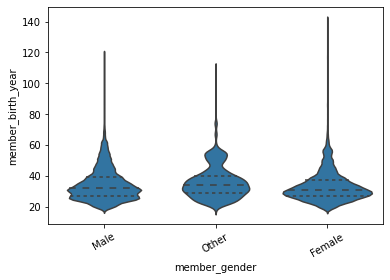

In [21]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df, x='member_gender', y='member_birth_year', color=base_color, inner='quartile')
plt.xticks(rotation=30);

#### which gender has the highest trip duration?

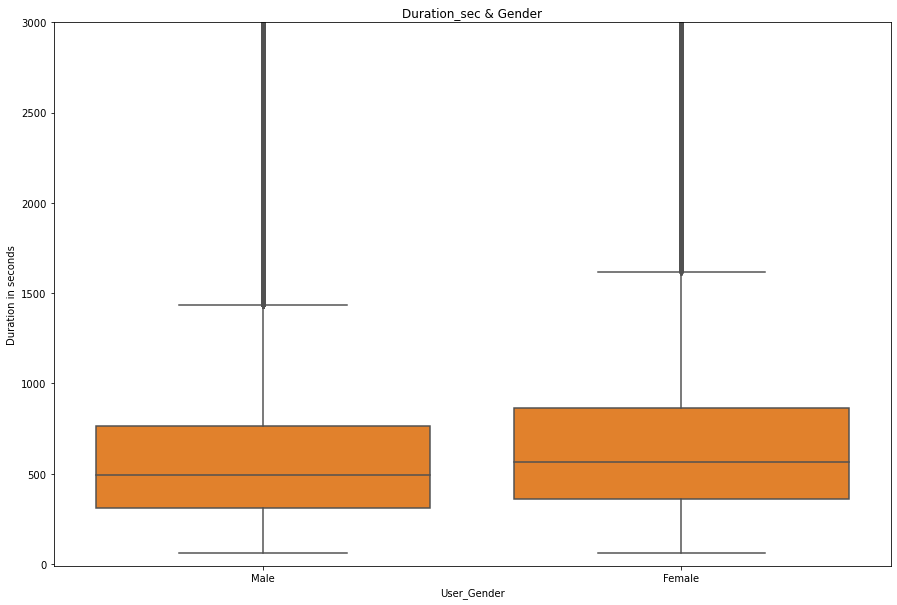

In [22]:
df.drop(df[df['member_gender'] == 'Other'].index, inplace = True)

plt.figure(figsize = [15, 10])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_sec', color = base_color)
plt.ylim([-10, 3000])
plt.title('Duration_sec & Gender')
plt.xlabel('User_Gender')
plt.ylabel('Duration in seconds')
plt.show()

#### The females's trip durations are slightly longer than the males's trip.

#### which day has the highest trip duration?

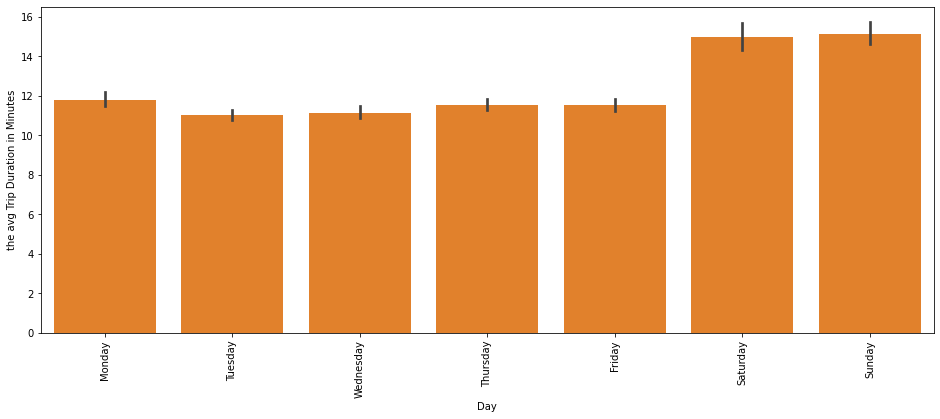

In [23]:
df['duration_minute'] = df['duration_sec']/60

df['start_day'] = df.start_time.dt.strftime('%A')

day_order=['Monday' , 'Tuesday' ,'Wednesday' , 'Thursday' , 'Friday' ,  'Saturday' , 'Sunday']

plt.figure(figsize=[16,6])
sb.barplot(data=df, x='start_day', y='duration_minute', color=base_color,order=day_order);
plt.xticks(rotation=90);
plt.xlabel('Day');
plt.ylabel('the avg Trip Duration in Minutes');

#### The no.of rides is greater in weekends than the other days.

#### What is the weekly usage of users type?

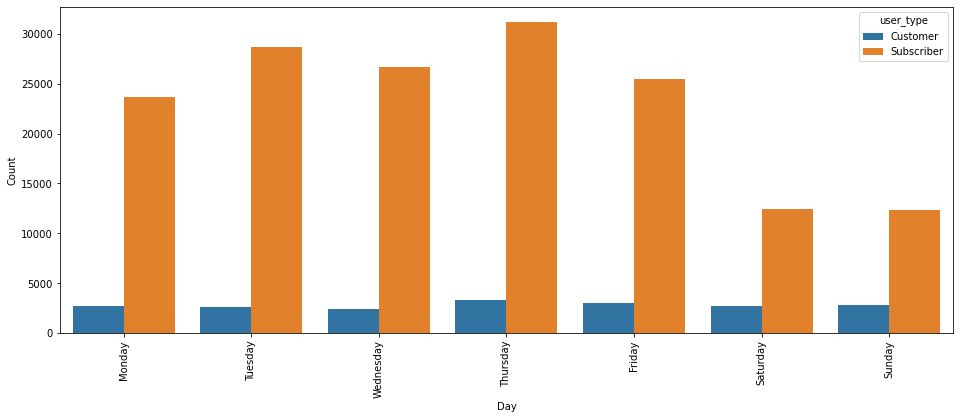

In [24]:
plt.figure(figsize=[16,6])

sb.countplot(data=df, x='start_day', hue='user_type',order=day_order);
plt.xticks(rotation=90);

plt.xlabel('Day');
plt.ylabel('Count');

#### the subscribers in the lead the whole weekdays but it decreases in weekends.


#### What is the weekly usage of users ages?

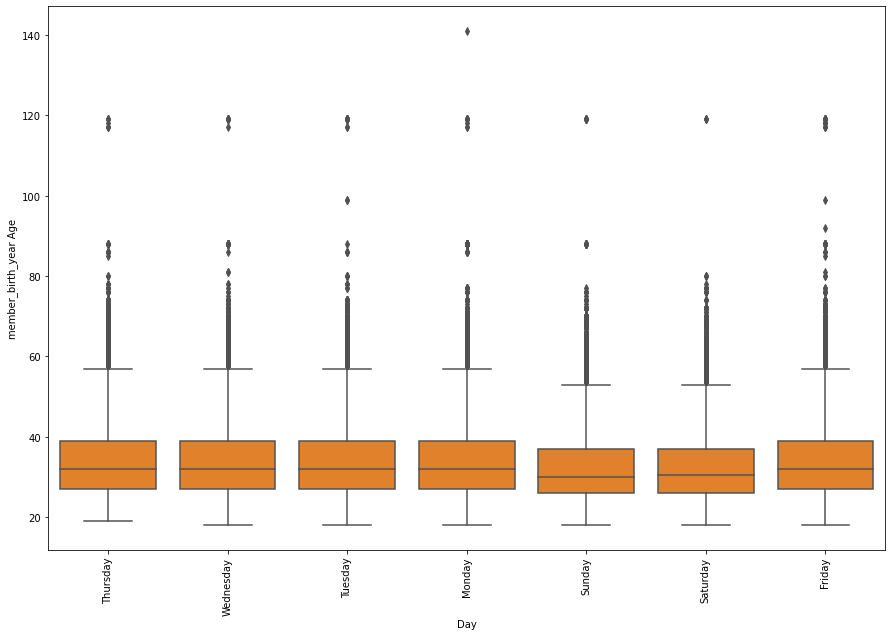

In [25]:
plt.figure(figsize = [15, 10])

sb.boxplot(data=df, x='start_day', y='member_birth_year', color=base_color);
plt.xticks(rotation=90);

plt.xlabel('Day');
plt.ylabel('member_birth_year Age');

#### The renters on weekends are younger than the renters on the other days.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The trip durations in Saturday and Sunday are greater than the other days, this mean that the rider's trip in holidays is longer than that of the way to their work.
the subscriber's trip duration is longer the whole weekdays but it decreases on weekends.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The females' trip durations are longer than the males' trip durations, but the number of males is much greater (Simpson's paradox).


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### What is the average of trip duration of each gender in each day?

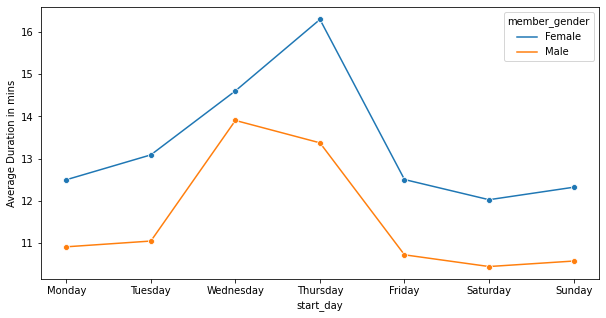

In [26]:
df.drop(df[df['member_gender'] == 'Other'].index, inplace = True)

gender_avg_dist_day = df.groupby(['member_gender','start_day']).duration_minutes.mean()
gender_avg_dist_day = gender_avg_dist_day.reset_index()


plt.figure(figsize=[10,5])
sb.lineplot(data = gender_avg_dist_day, x='start_day', y='duration_minutes', hue='member_gender', marker='o')
plt.xticks(np.arange(0,7), day_order)
plt.ylabel('Average Duration in mins');

#### Averagely, the females ride more than males at the start of each day.

#### What is the average trip duration of each day in a week?

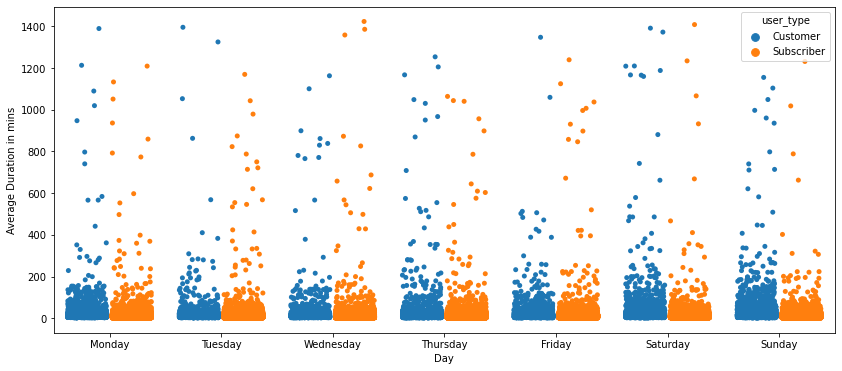

In [27]:
plt.figure(figsize=[14,6])
sb.stripplot(data=df, x='start_day', y='duration_minute', hue='user_type', dodge=0.6, jitter=0.35,order=day_order);
#plt.xticks(rotation=90);

plt.xlabel('Day');
plt.ylabel('Average Duration in mins');

### The above graph shows that subscribers likely take shorter trips than consumers on each day of the week.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

subscribers likely take shorter trips than consumers on each day of the week, On Saturdays and Sundays, both user categories show a noticeable rise in journey time during weekends, especially casual riders. Subscribers appear to be more efficient than customers in general, with a relatively stable average length from Monday to Friday.

### Were there any interesting or surprising interactions between features?

The average durations trips for females are greater than the males' average durations trips, so the females ride more than males but we really can't say that because of the huge difference between the number of males and the number of females.


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
!jupyter nbconvert Your_Slide_Deck_Name.ipynb --to slides --post serve  --no-input --no-prompt
